Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.
Recommended Analysis

<b>1 - How many customers joined the company during the last quarter? How many customers joined?

<b>2 - What is the customer profile for a customer that churned, joined, and stayed? Are they different?

<b>3 - What seem to be the key drivers of customer churn?

<b>4 - Is the company losing high value customers? If so, how can they retain them?</b>

# I - LIBRARIES IMPORT & DATA SET CREATION

 I am importing all the required libraries, and I firstly imported the data set in mySQL workbench and then I am using a connector to get the data and setup the data set in Python. 

In [1]:
import mysql.connector 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Markdown as md

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')

In [3]:
df_zipcode = pd.read_csv('telecom_zipcode_population.csv')

In [4]:
df_zipcode.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

# II - DATA CLEANING 

In this step, I checked for duplicate values, missing values, wrong formatting, and inconsistent formatting. The dataset was clean but checking for these gave me confidence in the dataset I needed to proceed to exploration.

First I will uniformize the name of the columns 

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [8]:
df.set_index('customer_id',inplace=True)

In [9]:
df.head()

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Now I will check for the missing values in 'churn_category' and 'churn_reason', eventually I will replace the missing one by 'no_churn' for those who stayed. Moreover I will change the customer_status to 0 when stayed and 1 when churned.

In [10]:
df.loc[(df.customer_status == 'Joined') | (df.customer_status == 'Stayed'),['churn_category','churn_reason']] = 'no churn'

In [11]:
df

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,no churn,no churn
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,no churn,no churn
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,no churn,no churn
9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,no churn,no churn


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   married                            7043 non-null   object 
 3   number_of_dependents               7043 non-null   int64  
 4   city                               7043 non-null   object 
 5   zip_code                           7043 non-null   int64  
 6   latitude                           7043 non-null   float64
 7   longitude                          7043 non-null   float64
 8   number_of_referrals                7043 non-null   int64  
 9   tenure_in_months                   7043 non-null   int64  
 10  offer                              7043 non-null   object 
 11  phone_service                      7043 non-nu

Now I am going to update the internet related categories according to the internet_service. I will put 0 and 'no' in every cells that are empty when the internet_service is not provided. I will do the exact same thing with the 'phone_service' feature.

In [13]:
df.loc[df.internet_service == 'No',['internet_type','online_security','online_backup','device_protection_plan','premium_tech_support','premium_tech_support' ,'streaming_tv','streaming_music','streaming_movies','unlimited_data']]= 'no'

In [14]:
df.loc[df.avg_monthly_gb_download.isnull(),'avg_monthly_gb_download'] = 0

In [15]:
df.loc[df.phone_service == 'No','avg_monthly_long_distance_charges'] = 0

In [16]:
df.loc[df.phone_service == 'No','multiple_lines'] = 'No'

Now, there is no more missing values, I am going to check for the different format.

In [17]:
df.head(20)

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,no churn,no churn
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,no churn,no churn
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,no churn,no churn
0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,no churn,no churn
0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,no churn,no churn
0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,7,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,no churn,no churn


I am going to change the data type of several columns to category to reduce the weight of the dataframe.

In [18]:
list_columns_to_modify = ('gender','married','offer','phone_service','multiple_lines','internet_service','internet_type','online_security','online_backup','device_protection_plan','premium_tech_support','premium_tech_support' ,'streaming_tv','streaming_music','streaming_movies','unlimited_data','contract','paperless_billing','payment_method','customer_status')

In [19]:
for elements in list_columns_to_modify:
    df[elements] = df[elements].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                7043 non-null   int64   
 2   married                            7043 non-null   category
 3   number_of_dependents               7043 non-null   int64   
 4   city                               7043 non-null   object  
 5   zip_code                           7043 non-null   int64   
 6   latitude                           7043 non-null   float64 
 7   longitude                          7043 non-null   float64 
 8   number_of_referrals                7043 non-null   int64   
 9   tenure_in_months                   7043 non-null   int64   
 10  offer                              7043 non-null   category
 11  phone_service                    

Here I am going to merge the first data set with the zip one in order to btain the states among the main data set, it's gonna be useful in a further analysis.

In [21]:
test = pd.merge(df,df_zipcode, left_on='zip_code', right_on='Zip Code', indicator=True)

In [22]:
test

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,...,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,Zip Code,Population,_merge
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,0.00,0,381.51,974.81,Stayed,no churn,no churn,93225,4498,both
1,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,...,43.25,0,456.90,1278.75,Stayed,no churn,no churn,93225,4498,both
2,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,...,0.00,0,2745.72,8495.52,Stayed,no churn,no churn,93225,4498,both
3,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,...,0.00,0,572.30,4217.80,Stayed,no churn,no churn,93225,4498,both
4,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,38.33,10,96.21,610.28,Stayed,no churn,no churn,91206,31297,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,...,32.09,0,203.70,803.01,Stayed,no churn,no churn,93013,17409,both
7039,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,...,0.00,0,782.34,4195.59,Stayed,no churn,no churn,95956,301,both
7040,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,...,0.00,0,179.80,966.10,Stayed,no churn,no churn,95956,301,both
7041,Male,39,No,0,Meadow Valley,95956,39.937017,-121.058043,0,38,...,0.00,0,1280.98,3878.58,Churned,Price,Lack of affordable download/upload speed,95956,301,both


# III - DATA EXPLORATION

Now I will be answering the following questions : <b> How many customers joined the company during the last quarter? How many customers joined?

Basically the <b>'tenure_in_months'</b> columns indicates the total amount of months that the customer has been with the company by the end of the quarter specified above. To calculate the numbers of customers that joined the company during the last quarter I will only take the 'tenure_in_months' criteria by fixing it between 0 and 3 months. Then I will calculate the numbers of customers that are considered as 'joined' in the 'customers_status' since the beggining and eventually the number of customers among those who joined in the last quarter who have the 'customer_status' as 'joined'. 
Then I will calculate the number of churn during the last quarter and the total churn since the begining.

In [23]:
customers_joined_last_quarter = df.loc[df.tenure_in_months <= 3].count().unique()[0] #all the customers that joined in the past 3 months even those who churned
customers_cs_joined_last_quart = df.loc[df.customer_status == 'Joined'].count().unique()[0] #joined only customers during the quarter

In [24]:
customer_churned_last_quarter = df.loc[(df.customer_status == 'Churned') & (df.tenure_in_months <= 3) ].count().unique()[0]
customer_churned_total = df.loc[df.customer_status =='Churned'].count().unique()[0]

In [25]:
joined_over_churn_last_quarter = (customers_cs_joined_last_quart,customer_churned_last_quarter)
labels = ('Customers who joined','Customer who churned')

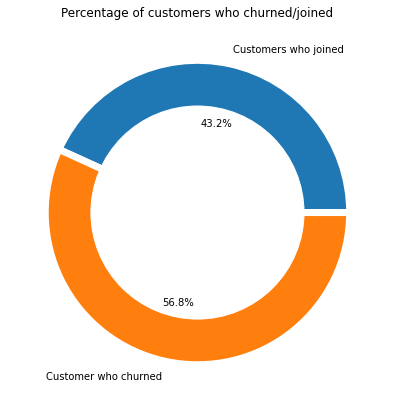

In [26]:
plt.figure(figsize=(15,7))
plt.pie(joined_over_churn_last_quarter,labels = labels,wedgeprops={ 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of customers who churned/joined')
plt.show()

As we can see there are more customers who churned that joined during the last quarter. I will compare it to the total of customers to have an idea of the proportion during the last quarter.

In [27]:
total_nb_customers = df.count()[0]

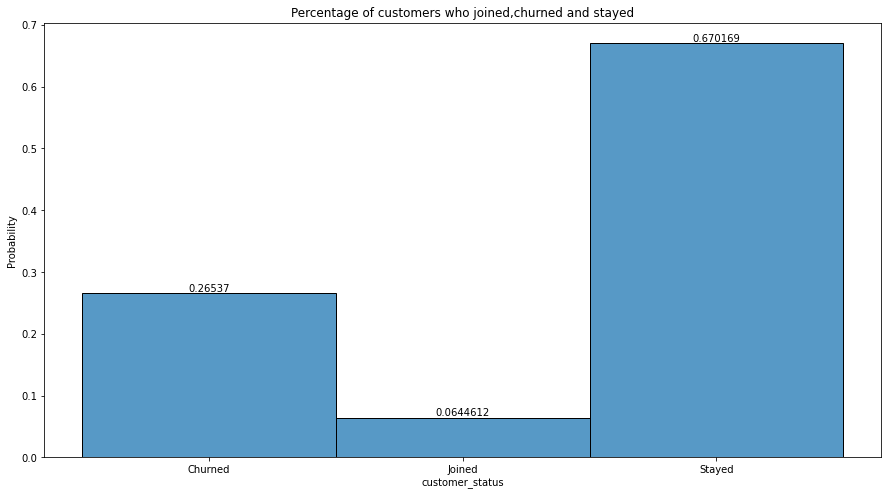

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
sns.color_palette("flare", as_cmap=True)
ax = sns.histplot(df , x=df.customer_status, stat='probability')
ax.bar_label(ax.containers[0])
ax.set_title('Percentage of customers who joined,churned and stayed')
plt.show()

Basically only <b>6,45%</b> of the customers just joined, <b>26.53%</b> churned and <b>67%</b> stayed during the last quarter. 

In [29]:
total_growth_rate = round(customers_joined_last_quarter / total_nb_customers,4 )*100
total_churn_rate = round(customer_churned_total / total_nb_customers,3)*100
net_customer_loss = round(total_churn_rate - total_growth_rate,3)

In [41]:
md("We obtained a <b>total growth rate of {0}%</b>, <b>a total churn rate of {1}%</b>, eventually our <b>net customer loss is {2}%</b>.".format(total_growth_rate,total_churn_rate,net_customer_loss))

We obtained a <b>total growth rate of 14.92%</b>, <b>a total churn rate of 26.5%</b>, eventually our <b>net customer loss is 11.58%</b>.

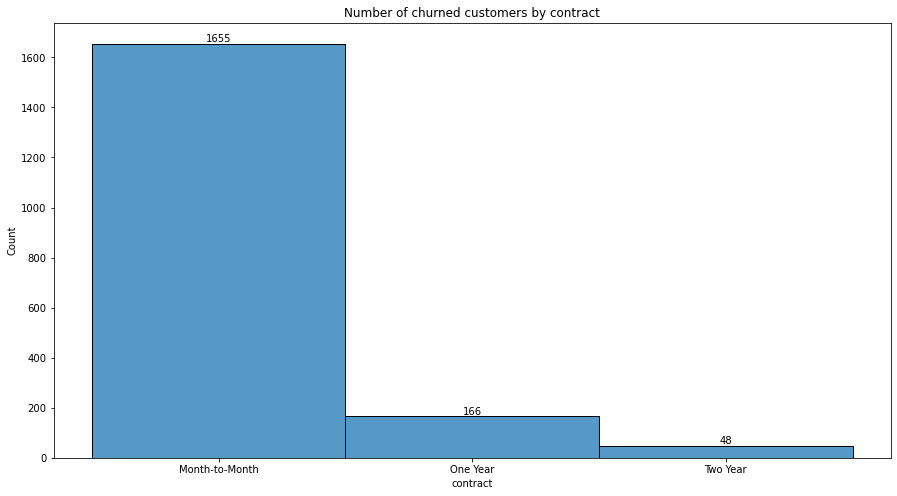

In [39]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.histplot(df.loc[df.customer_status =='Churned'], x=df.loc[df.customer_status =='Churned','contract'])
ax.bar_label(ax.containers[0])
ax.set_title('Number of churned customers by contract')
plt.show()

As we can see most of the customers who churned are monthly contracted to the company. It is quite logical given the fact that when you are commited with the company for one year you cannot churn easily. Indeed you will be forced to pay for all the fees whereas if you are under a monthly contract then you only have to wait for the end of one month and do not extend it.

<b>2 - What is the customer profile for a customer that churned, joined, and stayed? Are they different?

In [43]:
df.columns

Index(['gender', 'age', 'married', 'number_of_dependents', 'city', 'zip_code',
       'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months',
       'offer', 'phone_service', 'avg_monthly_long_distance_charges',
       'multiple_lines', 'internet_service', 'internet_type',
       'avg_monthly_gb_download', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

To examine the different customer profile we can firstly compare the percentage of man/women, the age, their marital status, the number of dependents, we can also give an attention to their localization and display it on the map of California. So I will take a few characteristic to create customer profile which could be attributed to their current status. 

<b>3 - What seem to be the key drivers of customer churn?

<b>4 - Is the company losing high value customers? If so, how can they retain them?</b>

# IV - DATA VISUALIZATION